In [ ]:
!python3 -m pip install git+http://github.com/beringresearch/cdrift

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

from cdrift import DriftRandomForestClassifier

In [2]:
data, target = load_iris(return_X_y=True, as_frame=True)

In [3]:
cd = DriftRandomForestClassifier(reference_X=data)

In [8]:
drift_pvals = []

for i in range(50):
    noise = np.random.normal(0, 1, data.shape) * 0.01 * i
    Xs_noise = data + noise
    cd.fit(Xs_noise)
    dist, pvals = cd.score(Xs_noise)
    drift_pvals.append(pvals)

Text(0, 0.5, 'p value')

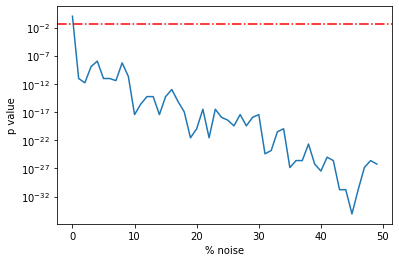

In [16]:
plt.plot(drift_pvals)
plt.axhline(y=0.05, color='r', linestyle='-.')
plt.yscale('log')
plt.xlabel('% noise')
plt.ylabel('p value')